# Data wrangling and cleaning of reviews

**Filename of dataset**
- selected_reviews.json - only products used in the other dataset
- full_reviews.json - all reviews of products scraped

________________________________________________________________________

In [1]:
#Import necessary libraries
import json 
import re
import os
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno
from collections import Counter

In [2]:
with open('../data/raw_data/selected_reviews.json', 'r') as file:
    raw_data= json.load(file)
reviews=pd.DataFrame.from_dict(raw_data)

In [3]:
reviews

,reviewer,r_productid,r_star,r_eyecolor,r_haircolor,r_skintone,r_skintype,r_skinconcerns,r_review
0,kelsb5,P409800,5,blue,blonde,light,combination,acne,Love this mini compact wipes bag! I bought the...
1,fairytatiana,P409800,4,blue,brunette,light,combination,acne,"very good, it can take most of your makeup wit..."
2,baimhas,P409800,5,blue,blonde,porcelain,dry,calluses,Love the watermelon ones! Don’t have to rub ha...
3,haleymcm,P409800,2,None,None,None,None,None,I bought the green tea version of these wipes ...
4,mariahswannie,P409800,4,blue,brunette,porcelain,dry,darkCircles,"Nice and cleansing, only 10 wipes though"
...,...,...,...,...,...,...,...,...,...
35159,shhh72,P418301,5,blue,blonde,light,normal,aging,I put this on every morning after washing my f...
35160,eaazye,P418301,5,gray,brunette,light,combination,acne,"so this was a random purchase, i literally jus..."
35161,Mariemill,P418301,5,blue,blonde,fair,combination,aging,Was skeptical but took the plunge based solely...
35162,JaeW,P418301,3,None,None,None,None,None,I've been using pretty religiously for over 10...


In [4]:
reviews.describe()

,r_star
count,35164.000000
mean,4.238483
std,1.221904
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Check for duplicated entries**

In [5]:
#indicative of duplicated entries, expecting only a 100 reviews per product
reviews.r_productid.value_counts()[:125]

P412117    424
P445464    373
P414293    361
P460758    328
P452701    312
          ... 
P411869    128
P451639    128
P442752    128
P247716    126
P399751    125
Name: r_productid, Length: 125, dtype: int64

In [6]:
reviews.shape

(35164, 9)

In [7]:
#Drop duplicated entries
reviews.drop(reviews[reviews.duplicated(keep='first')].index, inplace=True)

In [8]:
reviews.shape

(18849, 9)

**Address missing values**

In [9]:
#Check for missing values
reviews.isnull().sum()

reviewer           137
r_productid          0
r_star               0
r_eyecolor        4587
r_haircolor       4604
r_skintone        3608
r_skintype        2391
r_skinconcerns    5598
r_review            19
dtype: int64

<AxesSubplot:>

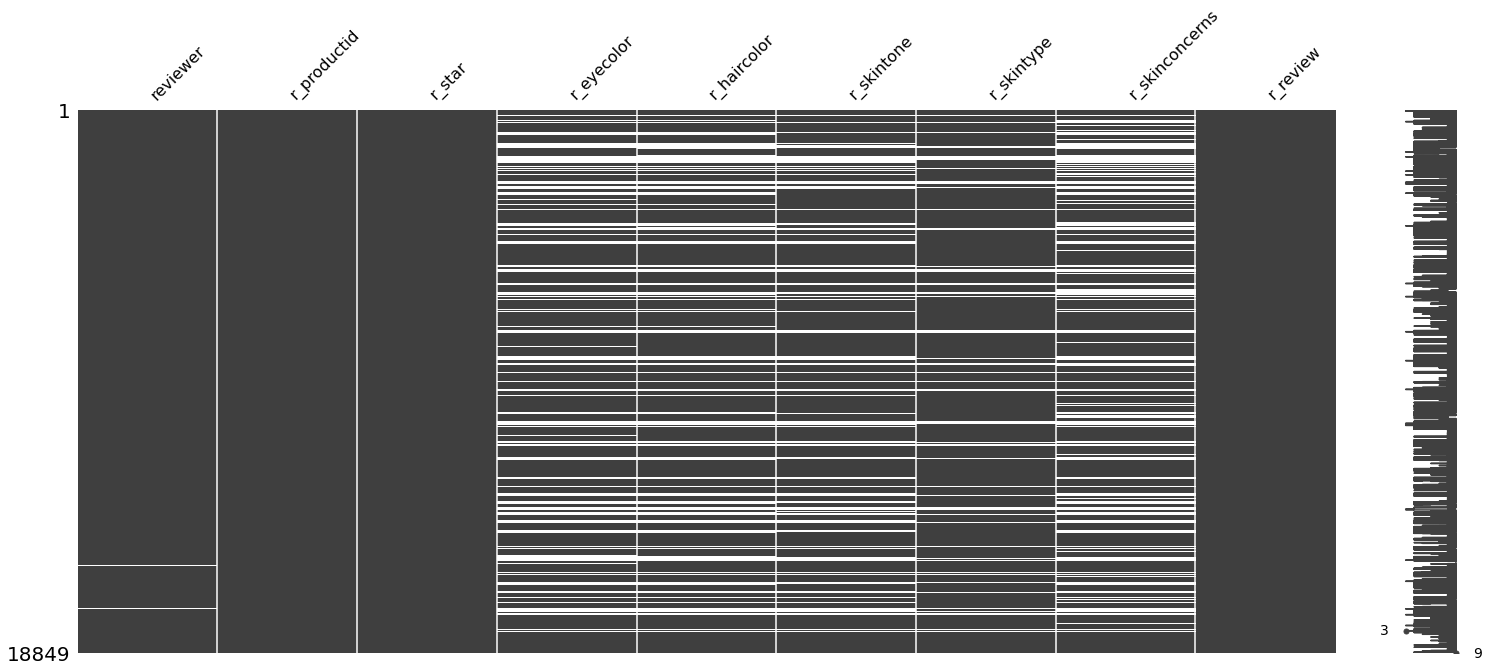

In [10]:
#Looks like reviews are complete; however, many entries have missing reviewer attributes.
msno.matrix(reviews)

<AxesSubplot:>

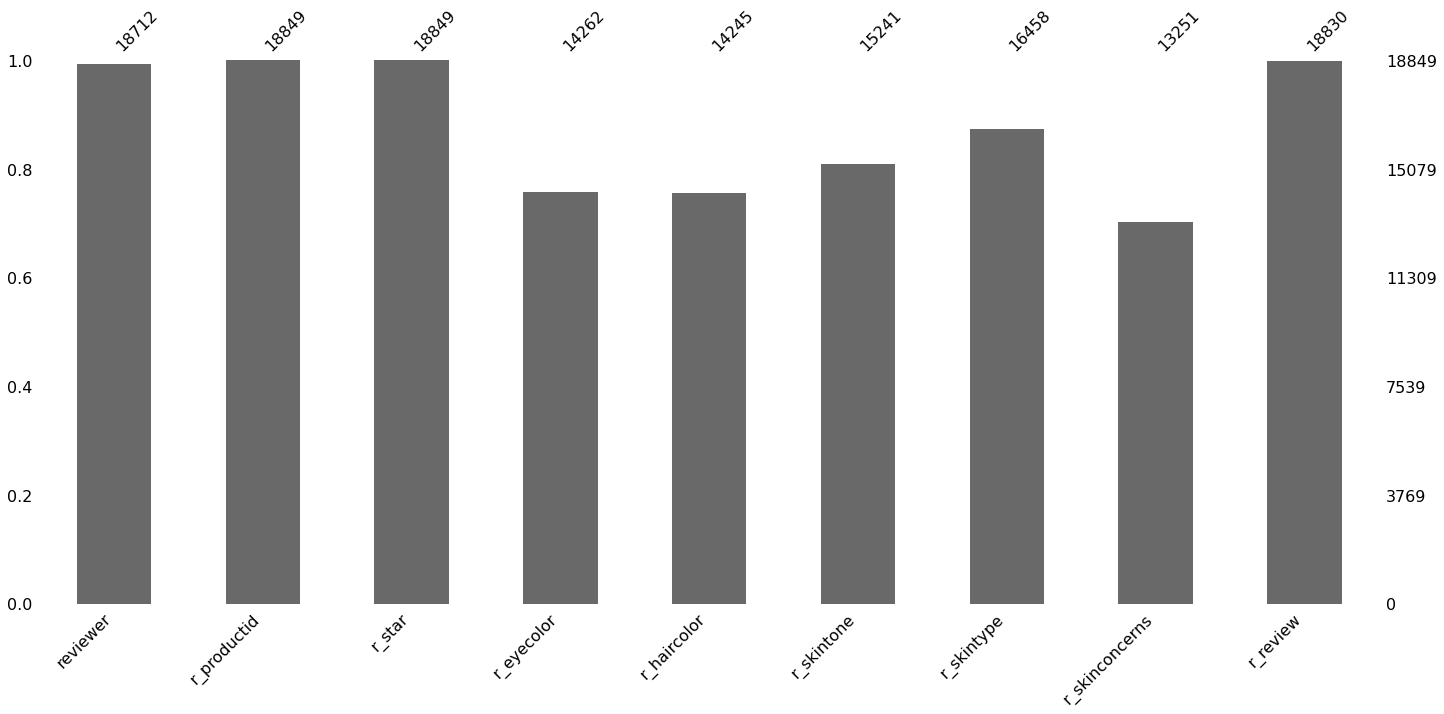

In [11]:
msno.bar(reviews)

Option 1: use mode to impute missing values

In [12]:
#Inspect before imputing - some rows have no reviewer attributes at all 
reviews[reviews.r_eyecolor.isna()]

,reviewer,r_productid,r_star,r_eyecolor,r_haircolor,r_skintone,r_skintype,r_skinconcerns,r_review
3,haleymcm,P409800,2,None,None,None,None,None,I bought the green tea version of these wipes ...
7,Jessica850,P409800,5,None,None,None,None,None,I had been using a naturals brand and wound up...
8,laura2003,P409800,5,None,None,None,None,None,Takes makeup off better than any other low end...
9,kweg15,P409800,5,None,None,None,None,None,I like these wipes. The smell is very rosy. T...
11,None,P409800,5,None,None,None,None,None,"I love a good cleansing wipe, but these are ev..."
...,...,...,...,...,...,...,...,...,...
35130,Mellilla,P418301,1,None,brunette,light,dry,None,I really wanted this to work. I used it faith...
35131,BuffyD,P418301,5,None,None,None,None,None,Time to bring out the heavy artillery and this...
35134,ScottyRoger652,P418301,5,None,None,None,None,None,Amazing! This product really does impact my po...
35136,Irynka123,P418301,5,None,blonde,fair,oily,None,"I am 36 years old, and I had some under eye li..."


In [13]:
#How many do not have all reviewer attributes 
reviews[reviews['r_eyecolor'].isna() & reviews['r_haircolor'].isna() &
        reviews['r_skintone'].isna() & reviews['r_skintype'].isna()]

,reviewer,r_productid,r_star,r_eyecolor,r_haircolor,r_skintone,r_skintype,r_skinconcerns,r_review
3,haleymcm,P409800,2,None,None,None,None,None,I bought the green tea version of these wipes ...
7,Jessica850,P409800,5,None,None,None,None,None,I had been using a naturals brand and wound up...
8,laura2003,P409800,5,None,None,None,None,None,Takes makeup off better than any other low end...
9,kweg15,P409800,5,None,None,None,None,None,I like these wipes. The smell is very rosy. T...
11,None,P409800,5,None,None,None,None,None,"I love a good cleansing wipe, but these are ev..."
...,...,...,...,...,...,...,...,...,...
35126,B3autyQu33n,P418301,5,None,None,None,None,None,I was a little skeptical but I will try anythi...
35129,afjka,P418301,1,None,None,None,None,None,Stopped working after 6 or 7 uses... same thin...
35131,BuffyD,P418301,5,None,None,None,None,None,Time to bring out the heavy artillery and this...
35134,ScottyRoger652,P418301,5,None,None,None,None,None,Amazing! This product really does impact my po...


In [14]:
reviews_df= reviews.copy()

In [15]:
#Impute with the mode
reviews_df['r_eyecolor'] = reviews.r_eyecolor.fillna(value='brown')
reviews_df['r_haircolor'] = reviews.r_haircolor.fillna(value='brunette')
reviews_df['r_skintone'] = reviews.r_skintone.fillna(value='light')

In [16]:
reviews_df.isna().sum()

reviewer           137
r_productid          0
r_star               0
r_eyecolor           0
r_haircolor          0
r_skintone           0
r_skintype        2391
r_skinconcerns    5598
r_review            19
dtype: int64

In [17]:
#Impute empty reviews
reviews_df['r_review']=reviews_df['r_review'].fillna('')

In [18]:
reviews_df.r_skintype.value_counts()

combination    8966
dry            3196
normal         2226
oily           2070
Name: r_skintype, dtype: int64

In [19]:
#Most common skintype cross-checked with domain knowledge - combination
reviews_df['r_skintype']=reviews_df['r_skintype'].fillna('combination')

In [20]:
#Add a new category for skinconcerns
reviews_df['r_skinconcerns']=reviews_df['r_skinconcerns'].fillna('unspecified')

In [22]:
#Check data before saving
reviews_df

,reviewer,r_productid,r_star,r_eyecolor,r_haircolor,r_skintone,r_skintype,r_skinconcerns,r_review
0,kelsb5,P409800,5,blue,blonde,light,combination,acne,Love this mini compact wipes bag! I bought the...
1,fairytatiana,P409800,4,blue,brunette,light,combination,acne,"very good, it can take most of your makeup wit..."
2,baimhas,P409800,5,blue,blonde,porcelain,dry,calluses,Love the watermelon ones! Don’t have to rub ha...
3,haleymcm,P409800,2,brown,brunette,light,combination,unspecified,I bought the green tea version of these wipes ...
4,mariahswannie,P409800,4,blue,brunette,porcelain,dry,darkCircles,"Nice and cleansing, only 10 wipes though"
...,...,...,...,...,...,...,...,...,...
18844,narkissos,P418301,5,blue,brunette,light,combination,acne,The warmth from this device really augments mo...
18845,MyFeedbacks,P418301,4,brown,brunette,medium,combination,acne,Can you please give access to the Canadian buy...
18846,lusciousliving,P418301,2,hazel,brunette,fair,normal,aging,"I've been using this for 3 nights in a row, so..."
18847,damselflavored,P418301,4,brown,brunette,light,combination,unspecified,It's so easy to use although I don't have fine...


In [21]:
reviews_df.reset_index(drop=True, inplace=True)

### Saving dataframe to file

In [23]:
datapath = '../data/processed_data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
    
datapath_df = os.path.join(datapath, 'reviews_cleaned.json')
if not os.path.exists(datapath_df):
    reviews_df.to_json(datapath_df)